In [133]:
import pandas as pd

In [134]:
df=pd.read_csv(r'C:\Users\ella.gorgin\Dropbox\Data_Analytics\Data_sets\Step_counter\Steps.csv',parse_dates=["Date"])
df.head()

,Date,Step Count,Distance Travelled,Active Time,Flights Climbed,Goal,Percentage of Goal Completed,Calories
0,2021-03-17,1500,1.02 km,23:14 min,3,10000,15%,64
1,2021-03-18,3165,2.23 km,44:56 min,2,10000,32%,134
2,2021-03-19,1494,1.08 km,24:51 min,0,10000,15%,68
3,2021-03-20,1808,1.27 km,30:04 min,1,10000,18%,81
4,2021-03-21,2667,1.78 km,30:57 min,3,10000,27%,103


In [135]:
df.shape

(526, 8)

In [171]:
df=df.drop_duplicates(keep='first')
df.shape

(526, 11)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          526 non-null    datetime64[ns]
 1   Step Count                    526 non-null    int64         
 2   Distance Travelled            526 non-null    object        
 3   Active Time                   526 non-null    object        
 4   Flights Climbed               526 non-null    int64         
 5   Goal                          526 non-null    int64         
 6   Percentage of Goal Completed  526 non-null    object        
 7   Calories                      526 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 33.0+ KB


array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Step Count'}>,
        <AxesSubplot:title={'center':'Distance Travelled'}>],
       [<AxesSubplot:title={'center':'Active Time'}>,
        <AxesSubplot:title={'center':'Flights Climbed'}>,
        <AxesSubplot:title={'center':'Goal'}>],
       [<AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

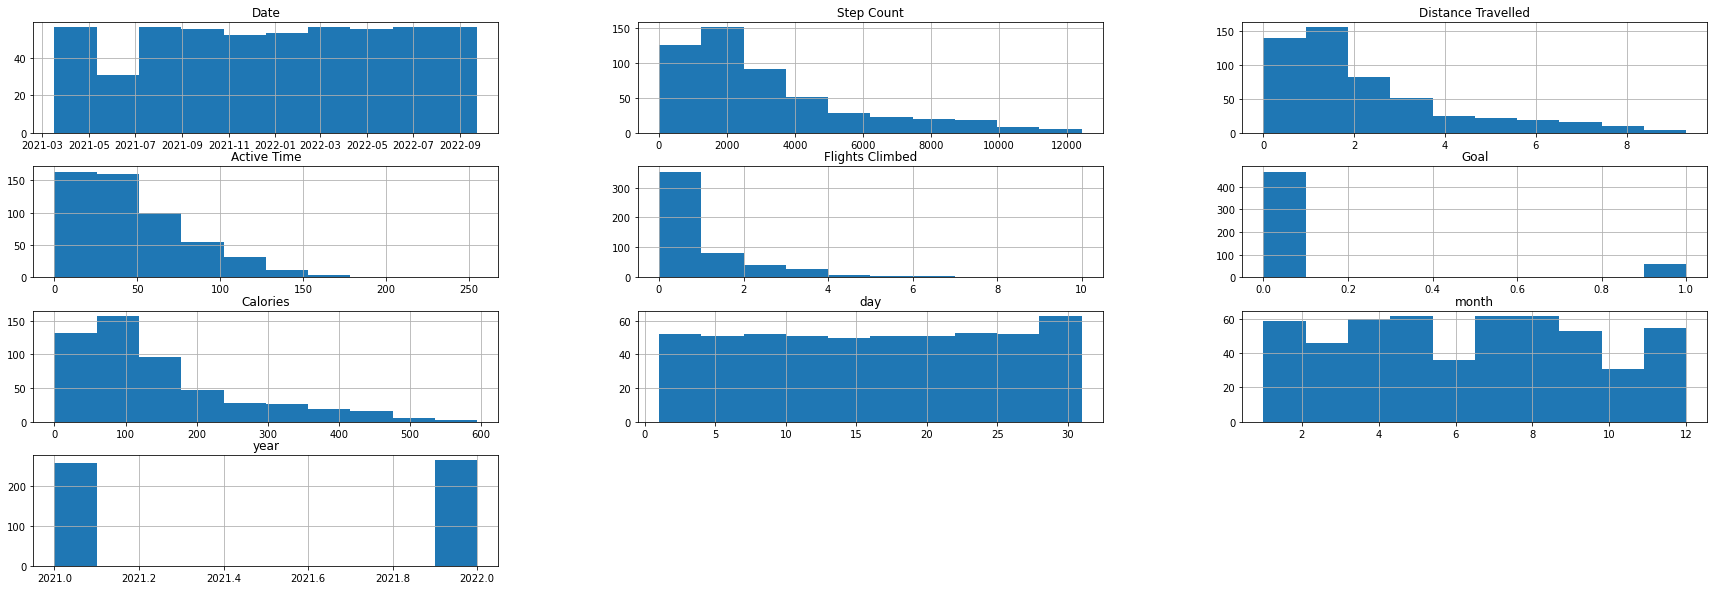

In [172]:
df.hist(figsize=(30,10))

In [137]:
df.isnull().sum()

Date                            0
Step Count                      0
Distance Travelled              0
Active Time                     0
Flights Climbed                 0
Goal                            0
Percentage of Goal Completed    0
Calories                        0
dtype: int64

# Active time

In [138]:
def time_transform(x):
    num=x.split(' ')
    if num[1] =='min':
        a=num[0].split(':')
        return(int(a[0]))
    else:
        a=num[0].split(':')
        return(int(a[0])*60+int(a[1]))

In [139]:
df['Active Time']=df['Active Time'].apply(time_transform)

In [140]:
df['Active Time'].head()

0    23
1    44
2    24
3    30
4    30
Name: Active Time, dtype: int64

In [141]:
df['Active Time'].min()

0

In [142]:
df['Active Time'].max()

255

In [143]:
df['Active Time']=df['Active Time'].astype(float)

# Goal

In [144]:
df.groupby('Goal')['Goal'].aggregate('count')

Goal
3500     467
10000     59
Name: Goal, dtype: int64

In [145]:
replace_values_steps ={3500 :0, 10000 :1}
df=df.replace({"Goal": replace_values_steps})

In [146]:
df.groupby('Goal')['Goal'].aggregate('count')

Goal
0    467
1     59
Name: Goal, dtype: int64

# Distance Travelled

In [147]:
df['Distance Travelled']=df['Distance Travelled'].apply(lambda x: x.split(' ')[0])
df['Distance Travelled'].head()

0    1.02
1    2.23
2    1.08
3    1.27
4    1.78
Name: Distance Travelled, dtype: object

In [148]:
df['Distance Travelled']=df['Distance Travelled'].astype(float)

# Date

In [149]:
df['day'] = df['Date'].map(lambda x: x.day)
df['month'] = df['Date'].map(lambda x: x.month)
df['year'] = df['Date'].map(lambda x: x.year)

In [150]:
df.head()

,Date,Step Count,Distance Travelled,Active Time,Flights Climbed,Goal,Percentage of Goal Completed,Calories,day,month,year
0,2021-03-17,1500,1.02,23.0,3,1,15%,64,17,3,2021
1,2021-03-18,3165,2.23,44.0,2,1,32%,134,18,3,2021
2,2021-03-19,1494,1.08,24.0,0,1,15%,68,19,3,2021
3,2021-03-20,1808,1.27,30.0,1,1,18%,81,20,3,2021
4,2021-03-21,2667,1.78,30.0,3,1,27%,103,21,3,2021


# Percentage of Goal Completed

In [151]:
df['Percentage of Goal Completed']=df['Percentage of Goal Completed'].apply(lambda x: x.replace("%", ""))

In [152]:
df['Percentage of Goal Completed'].astype(int)

0       15
1       32
2       15
3       18
4       27
      ... 
521     48
522    105
523     13
524     14
525      4
Name: Percentage of Goal Completed, Length: 526, dtype: int32

In [153]:
df['Percentage of Goal Completed'].max()

'99'

# Modeling

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          526 non-null    datetime64[ns]
 1   Step Count                    526 non-null    int64         
 2   Distance Travelled            526 non-null    float64       
 3   Active Time                   526 non-null    float64       
 4   Flights Climbed               526 non-null    int64         
 5   Goal                          526 non-null    int64         
 6   Percentage of Goal Completed  526 non-null    object        
 7   Calories                      526 non-null    int64         
 8   day                           526 non-null    int64         
 9   month                         526 non-null    int64         
 10  year                          526 non-null    int64         
dtypes: datetime64[ns](1), float64(2)

In [162]:
X = df.drop(['Calories','Date'], axis='columns')

In [163]:
y= df['Calories']

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
Model = RandomForestRegressor()

In [168]:
Model.fit(X_train, y_train)

RandomForestRegressor()

In [170]:
Model.score(X_test, y_test)

0.997882782437107